In [1]:
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab
from skimage.transform import rescale


C:\Users\DELL\AppData\Local\Temp/ipykernel_2392/2513162357.py:12: RuntimeWarning: divide by zero encountered in true_divide
  im_dir=np.arctan(im_y/im_x)
C:\Users\DELL\AppData\Local\Temp/ipykernel_2392/2513162357.py:12: RuntimeWarning: invalid value encountered in true_divide
  im_dir=np.arctan(im_y/im_x)


<Figure size 432x288 with 0 Axes>

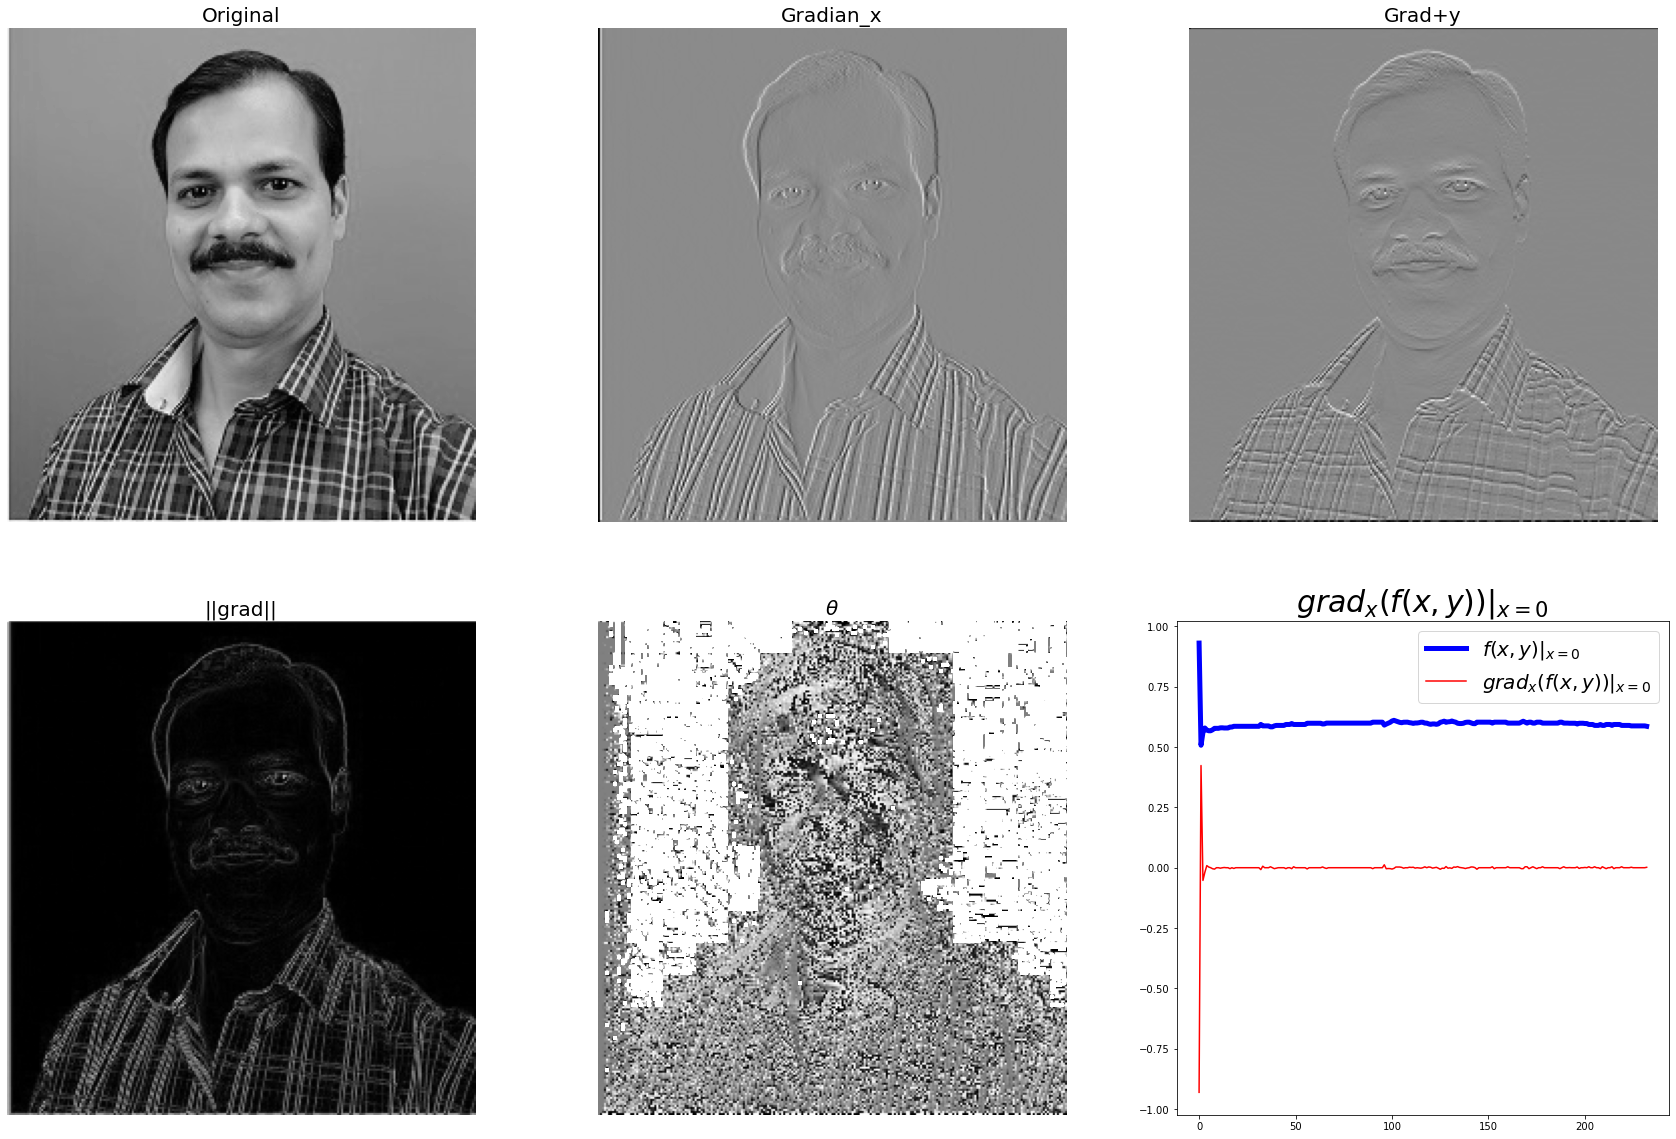

In [2]:
def plot_image(image, title):
    pylab.imshow(image)
    pylab.title(title, size=20)
    pylab.axis('off')

ker_x=[[-1,1]]
ker_y=[[-1],[1]]
im=rgb2gray(imread('images/rkm.jpg'))
im_x=signal.convolve2d(im,ker_x,mode='same')
im_y=signal.convolve2d(im,ker_y,mode='same')
im_mag=np.sqrt(im_x**2+im_y**2)
im_dir=np.arctan(im_y/im_x)
pylab.gray()
pylab.figure(figsize=(30,20))
pylab.subplot(231), plot_image(im,'Original')
pylab.subplot(232), plot_image(im_x,'Gradian_x')
pylab.subplot(233), plot_image(im_y,'Grad+y')
pylab.subplot(234), plot_image(im_mag,'||grad||')
pylab.subplot(235), plot_image(im_dir, r'$\theta$')
pylab.subplot(236), 
pylab.plot(range(im.shape[1]), im[0,:], 'b-', label=r'$f(x,y)|_{x=0}$', linewidth=5)
pylab.plot(range(im.shape[1]), im_x[0,:], 'r-', label=r'$grad_x (f(x,y))|_{x=0}$')
pylab.title(r'$grad_x (f(x,y))|_{x=0}$',size=30)
pylab.legend(prop={'size':20})
pylab.show()


<Figure size 432x288 with 0 Axes>

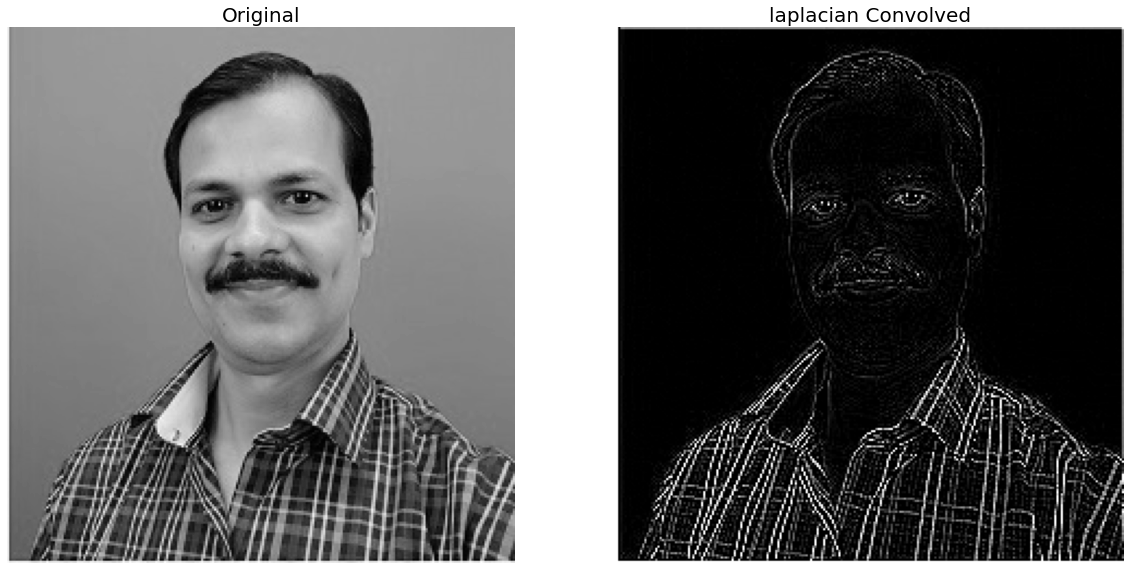

In [3]:
ker_laplacian=[[0,-1,0],
               [-1,4,-1],
               [0,-1,0]]
im=rgb2gray(imread('images/rkm.jpg'))
im1=np.clip(signal.convolve2d(im, ker_laplacian, mode='same'),0,1)
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(121), plot_image(im, 'Original')
pylab.subplot(122),plot_image(im1,'laplacian Convolved')
pylab.show()